In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.0 MB/s eta 0:00:00


In [2]:
import mne
#fname = '/content/gdrive/MyDrive/eeg data/easycapM11.mat'
ch, mtx = mne.channels.read_ch_adjacency('easycapM11', picks=None)

In [3]:
mt=ch.toarray().astype('float64')

In [4]:
mt

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [5]:
rows, cols = mt.shape

In [6]:
for i in range(min(rows, cols)):
    mt[i, i] = 0

print(mt)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
import numpy as np

In [8]:
# Normalize the connectivity matrix
row_sums = mt.sum(axis=1)  # Calculate the sum of each row
normalized_matrix = mt / row_sums[:, np.newaxis]  # Normalize each row

# Print the normalized connectivity matrix
print(normalized_matrix)

[[0.   0.25 0.   ... 0.   0.   0.  ]
 [0.2  0.   0.2  ... 0.   0.   0.  ]
 [0.   0.25 0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.25 0.  ]
 [0.   0.   0.   ... 0.2  0.   0.2 ]
 [0.   0.   0.   ... 0.   0.25 0.  ]]


In [ ]:
np.save("spatial_conn_matrix.npy", mt )

In [9]:
import pandas as pd
df = pd.DataFrame(normalized_matrix)

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

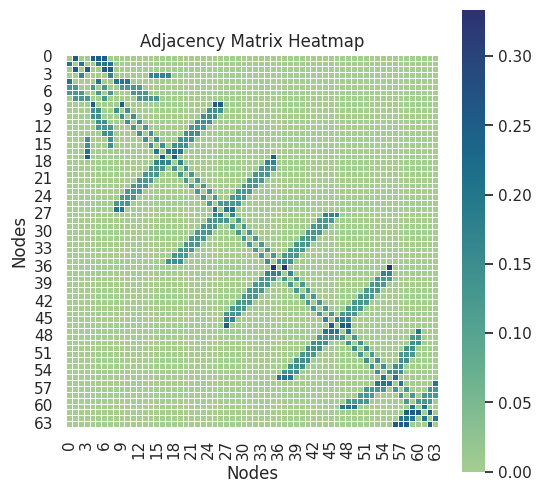

In [11]:
import seaborn as sns
# Create a heatmap using seaborn
sns.set(style="darkgrid")  # Add grid lines
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.heatmap(normalized_matrix, cmap="crest", linewidths=0.5, square=True, cbar=True)

# Add labels and title
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.title("Adjacency Matrix Heatmap")

# Show the heatmap
plt.show()